# 神经网络基础概念




## 神经网络(NN)复杂度
- 空间复杂度
    - 总层数 = 隐藏层 + 输出层
    - 总参数 w+b
- 时间复杂度
    - 乘法和加法运算


    
## 学习率
- $w_{t+1} = w_t - lr*{ \partial loss \over \partial w_t}$
- 指数衰减学习率

In [9]:
import tensorflow as tf
import numpy as np

SEED = 23455
rdm = np.random.RandomState(seed=SEED)  # 生成[0,1)之间的随机数
x = rdm.rand(32, 2)
GT = [[x1 + x2 + (rdm.rand() / 10.0 - 0.05)] for (x1, x2) in x]  # 生成噪声[0,1)/10=[0,0.1); [0,0.1)-0.05=[-0.05,0.05)
x = tf.cast(x, dtype=tf.float32)

w1 = tf.Variable(tf.random.normal([2, 1], stddev=1, seed=1))

epochs = 400
lr_base = 0.2
lr_decay = 0.99
lr_step = 1


for epoch in range(epochs):
    lr = lr_base * lr_decay ** (epoch / lr_step)
    with tf.GradientTape() as tape:
        y_pred = tf.matmul(x, w1)
        loss = tf.reduce_mean(tf.square(GT - y_pred))
    grads = tape.gradient(loss , w1)
    w1.assign_sub(lr * grads)
    print("After %s epoch, w1 is %s, loss is %f, lr is %f" % (epoch, w1.numpy(), loss, lr))
    





After 0 epoch, w1 is [[ 0.92725235]
 [-1.2812972 ]], loss is 2.987465, lr is 0.200000
After 1 epoch, w1 is [[ 1.1352899 ]
 [-0.95835483]], loss is 1.897339, lr is 0.198000
After 2 epoch, w1 is [[ 1.2893956]
 [-0.7010726]], loss is 1.230971, lr is 0.196020
After 3 epoch, w1 is [[ 1.4023864 ]
 [-0.49460575]], loss is 0.819819, lr is 0.194060
After 4 epoch, w1 is [[ 1.4840089]
 [-0.3276245]], loss is 0.563363, lr is 0.192119
After 5 epoch, w1 is [[ 1.5416914]
 [-0.1914547]], loss is 0.401307, lr is 0.190198
After 6 epoch, w1 is [[ 1.581108  ]
 [-0.07943477]], loss is 0.297274, lr is 0.188296
After 7 epoch, w1 is [[1.6066012 ]
 [0.01356756]], loss is 0.229188, lr is 0.186413
After 8 epoch, w1 is [[1.6215013 ]
 [0.09151912]], loss is 0.183575, lr is 0.184549
After 9 epoch, w1 is [[1.628366  ]
 [0.15749598]], loss is 0.152155, lr is 0.182703
After 10 epoch, w1 is [[1.6291627]
 [0.2138916]], loss is 0.129813, lr is 0.180876
After 11 epoch, w1 is [[1.6254064 ]
 [0.26257482]], loss is 0.113362,

After 156 epoch, w1 is [[1.0511616]
 [0.9537204]], loss is 0.001043, lr is 0.041698
After 157 epoch, w1 is [[1.0507785 ]
 [0.95405656]], loss is 0.001036, lr is 0.041282
After 158 epoch, w1 is [[1.0504023 ]
 [0.95438665]], loss is 0.001030, lr is 0.040869
After 159 epoch, w1 is [[1.0500329]
 [0.9547108]], loss is 0.001024, lr is 0.040460
After 160 epoch, w1 is [[1.0496701 ]
 [0.95502913]], loss is 0.001018, lr is 0.040055
After 161 epoch, w1 is [[1.0493138 ]
 [0.95534176]], loss is 0.001012, lr is 0.039655
After 162 epoch, w1 is [[1.0489638 ]
 [0.95564884]], loss is 0.001006, lr is 0.039258
After 163 epoch, w1 is [[1.04862  ]
 [0.9559505]], loss is 0.001001, lr is 0.038866
After 164 epoch, w1 is [[1.0482823 ]
 [0.95624685]], loss is 0.000995, lr is 0.038477
After 165 epoch, w1 is [[1.0479505]
 [0.956538 ]], loss is 0.000990, lr is 0.038092
After 166 epoch, w1 is [[1.0476245 ]
 [0.95682406]], loss is 0.000985, lr is 0.037711
After 167 epoch, w1 is [[1.0473042 ]
 [0.95710516]], loss is 0

 [0.9731548]], loss is 0.000759, lr is 0.009142
After 308 epoch, w1 is [[1.0289673 ]
 [0.97319365]], loss is 0.000758, lr is 0.009050
After 309 epoch, w1 is [[1.0289235 ]
 [0.97323203]], loss is 0.000758, lr is 0.008960
After 310 epoch, w1 is [[1.0288802]
 [0.97327  ]], loss is 0.000757, lr is 0.008870
After 311 epoch, w1 is [[1.0288374]
 [0.9733075]], loss is 0.000757, lr is 0.008782
After 312 epoch, w1 is [[1.0287952 ]
 [0.97334456]], loss is 0.000757, lr is 0.008694
After 313 epoch, w1 is [[1.0287535]
 [0.9733812]], loss is 0.000756, lr is 0.008607
After 314 epoch, w1 is [[1.0287123]
 [0.9734174]], loss is 0.000756, lr is 0.008521
After 315 epoch, w1 is [[1.0286715 ]
 [0.97345316]], loss is 0.000756, lr is 0.008436
After 316 epoch, w1 is [[1.0286312]
 [0.9734885]], loss is 0.000755, lr is 0.008351
After 317 epoch, w1 is [[1.0285914 ]
 [0.97352344]], loss is 0.000755, lr is 0.008268
After 318 epoch, w1 is [[1.028552]
 [0.973558]], loss is 0.000755, lr is 0.008185
After 319 epoch, w1 

## 激活函数
### 特点
- 提升模型表达力
- 非线性
- 可微性
- 单调性：保证单层网络的损失函数是凸函数
- 近似恒等型：$f(x) \approx x， 当参数初始化为随机小值时神经网络更稳定$
### 输出值范围
- 有限值， 基于梯度的优化方法更稳定
- 无限值， 初始值对网络影响大， 建议调小学习率

### 常用激活函数
- Sigmoid 函数 
  - $f(x) = {{1} \over {1 + e^{-x}}}$
  - 导数在0~0.25之间，多层累计相乘易造成梯度消失
  - 输出非零均值，收敛变慢
  - 幂运算难运算，训练时间长
 
- Tanh 函数
  - 输出零均值
  - 梯度消失
  幂运算
  
- Relu 函数
  - 解决梯度消失问题（正区间）
  - 计算速度快收敛相对快
  - 输出非零均值，收敛慢
  - Dead ReIU问题，如果负数特征过多可能导致激活函数输出一直是0.反向传播梯度为0，某些神经元可能永远无法被激活，参数不更新

- Leaky Relu
  - 改进了relu函数负区间的问题
  - 实际效果中并没有验证它总是优于relu函数
  
- 建议
  - 激活函数relu
  - 学习率小
  - 输入特征标准化，mean = 0, var = 1正太分布
  - 初始参数中心化，即让随机生成的参数满足0为均值，标准差 = $\sqrt{2 \over {当前输入特征个数}}$的正太分布

## 损失函数

### 定义
- 预测值和GT的差距

### 常见目标函数
- MSE 均方误差： tf.reduce_mean(tf.square( y - y_pred))

- CE(Cross entropy) 表征两个分布之间的差距
  - $H(y_, y) = - \sum{y\_ * lny}$
  - tf.losses.categorical_crossentropy(y, y_)
- 自定义

- softmax + ce 针对分类问题
  - tf.nn.softmax_cross_entropy_with_logits(y, y_)

## 过拟合 欠拟合 
- 过拟合：数据清洗 增大训练集 正则化 正则化参数
- 欠拟合：增加输入特征项 增加网络参数 减少正则化

epoch: 0 loss: 2.963813066482544
epoch: 20 loss: 0.5319880843162537
epoch: 40 loss: 0.44191956520080566
epoch: 60 loss: 0.3908034563064575
epoch: 80 loss: 0.3498925268650055
epoch: 100 loss: 0.3143770694732666
epoch: 120 loss: 0.2832772135734558
epoch: 140 loss: 0.25593340396881104
epoch: 160 loss: 0.23210382461547852
epoch: 180 loss: 0.2112630307674408
epoch: 200 loss: 0.19282951951026917
epoch: 220 loss: 0.17660322785377502
epoch: 240 loss: 0.16242335736751556
epoch: 260 loss: 0.14997807145118713
epoch: 280 loss: 0.1391836255788803
epoch: 300 loss: 0.1298028528690338
epoch: 320 loss: 0.12165897339582443
epoch: 340 loss: 0.1146019846200943
epoch: 360 loss: 0.10844461619853973
epoch: 380 loss: 0.10312002152204514
*******predict*******


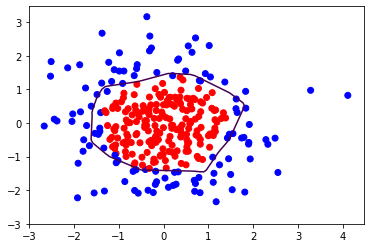

In [1]:
# 导入所需模块
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# 读入数据/标签 生成x_train y_train
df = pd.read_csv('dot.csv')
x_data = np.array(df[['x1', 'x2']])
y_data = np.array(df['y_c'])

x_train = x_data
y_train = y_data.reshape(-1, 1)

Y_c = [['red' if y else 'blue'] for y in y_train]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型问题报错
x_train = tf.cast(x_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)

# from_tensor_slices函数切分传入的张量的第一个维度，生成相应的数据集，使输入特征和标签值一一对应
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)

# 生成神经网络的参数，输入层为4个神经元，隐藏层为32个神经元，2层隐藏层，输出层为3个神经元
# 用tf.Variable()保证参数可训练
w1 = tf.Variable(tf.random.normal([2, 11]), dtype=tf.float32)
b1 = tf.Variable(tf.constant(0.01, shape=[11]))

w2 = tf.Variable(tf.random.normal([11, 1]), dtype=tf.float32)
b2 = tf.Variable(tf.constant(0.01, shape=[1]))

lr = 0.01  # 学习率为
epoch = 400  # 循环轮数

# 训练部分
for epoch in range(epoch):
    for step, (x_train, y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:  # 记录梯度信息

            h1 = tf.matmul(x_train, w1) + b1  # 记录神经网络乘加运算
            h1 = tf.nn.relu(h1)
            y = tf.matmul(h1, w2) + b2

            # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_mse = tf.reduce_mean(tf.square(y_train - y))
            # 添加l2正则化
            loss_regularization = []
            # tf.nn.l2_loss(w)=sum(w ** 2) / 2
            loss_regularization.append(tf.nn.l2_loss(w1))
            loss_regularization.append(tf.nn.l2_loss(w2))
            # 求和
            # 例：x=tf.constant(([1,1,1],[1,1,1]))
            #   tf.reduce_sum(x)
            # >>>6
            # loss_regularization = tf.reduce_sum(tf.stack(loss_regularization))
            loss_regularization = tf.reduce_sum(loss_regularization)
            loss = loss_mse + 0.03 * loss_regularization #REGULARIZER = 0.03

        # 计算loss对各个参数的梯度
        variables = [w1, b1, w2, b2]
        grads = tape.gradient(loss, variables)

        # 实现梯度更新
        # w1 = w1 - lr * w1_grad
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])

    # 每200个epoch，打印loss信息
    if epoch % 20 == 0:
        print('epoch:', epoch, 'loss:', float(loss))

# 预测部分
print("*******predict*******")
# xx在-3到3之间以步长为0.01，yy在-3到3之间以步长0.01,生成间隔数值点
xx, yy = np.mgrid[-3:3:.1, -3:3:.1]
# 将xx, yy拉直，并合并配对为二维张量，生成二维坐标点
grid = np.c_[xx.ravel(), yy.ravel()]
grid = tf.cast(grid, tf.float32)
# 将网格坐标点喂入神经网络，进行预测，probs为输出
probs = []
for x_predict in grid:
    # 使用训练好的参数进行预测
    h1 = tf.matmul([x_predict], w1) + b1
    h1 = tf.nn.relu(h1)
    y = tf.matmul(h1, w2) + b2  # y为预测结果
    probs.append(y)

# 取第0列给x1，取第1列给x2
x1 = x_data[:, 0]
x2 = x_data[:, 1]
# probs的shape调整成xx的样子￥￥￥￥￥￥￥￥￥￥￥￥￥￥￥￥￥￥￥￥￥￥
probs = np.array(probs).reshape(xx.shape)

plt.scatter(x1, x2, color=np.squeeze(Y_c))
# 把坐标xx yy和对应的值probs放入contour<[‘kɑntʊr]>函数，给probs值为0.5的所有点上色  plt点show后 显示的是红蓝点的分界线
plt.contour(xx, yy, probs, levels=[.5]) #levels = 0.5的意思是我们要在z=0.5的地方画一条等高线。
plt.show()

# 读入红蓝点，画出分割线，包含正则化
# 不清楚的数据，建议print出来查看 

<a list of 8 text.Text objects>

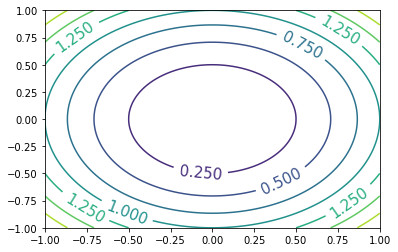

In [14]:
#等高线绘制

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X,Y = np.meshgrid(x, y)
Z = X**2 + Y**2

plt.subplot()
c = plt.contour(X, Y ,Z,8 )
plt.clabel(c,inline=True,fontsize=15)


epoch: 0 loss: 1.019515872001648
epoch: 20 loss: 0.12106224149465561
epoch: 40 loss: 0.028273118659853935
epoch: 60 loss: 0.025027865543961525
epoch: 80 loss: 0.02436244487762451
epoch: 100 loss: 0.024622008204460144
epoch: 120 loss: 0.025366589426994324
epoch: 140 loss: 0.026283757761120796
epoch: 160 loss: 0.02705642580986023
epoch: 180 loss: 0.02760409004986286
epoch: 200 loss: 0.028147419914603233
epoch: 220 loss: 0.02907411754131317
epoch: 240 loss: 0.029772398993372917
epoch: 260 loss: 0.031214462593197823
epoch: 280 loss: 0.03187614306807518
epoch: 300 loss: 0.0322052501142025
epoch: 320 loss: 0.03254469111561775
epoch: 340 loss: 0.03254356235265732
epoch: 360 loss: 0.0324706993997097
epoch: 380 loss: 0.03234682232141495
*******predict*******


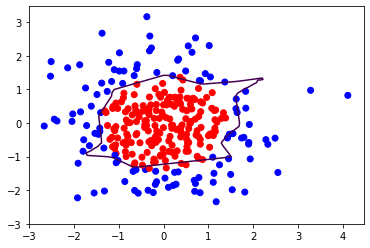

In [14]:
# 导入所需模块
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# 读入数据/标签 生成x_train y_train
df = pd.read_csv('dot.csv')
x_data = np.array(df[['x1', 'x2']])
y_data = np.array(df['y_c'])

x_train = np.vstack(x_data).reshape(-1,2)
y_train = np.vstack(y_data).reshape(-1,1)

Y_c = [['red' if y else 'blue'] for y in y_train]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型问题报错
x_train = tf.cast(x_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)

# from_tensor_slices函数切分传入的张量的第一个维度，生成相应的数据集，使输入特征和标签值一一对应
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)

# 生成神经网络的参数，输入层为2个神经元，隐藏层为11个神经元，1层隐藏层，输出层为1个神经元
# 用tf.Variable()保证参数可训练
w1 = tf.Variable(tf.random.normal([2, 11]), dtype=tf.float32)
b1 = tf.Variable(tf.constant(0.01, shape=[11]))

w2 = tf.Variable(tf.random.normal([11, 1]), dtype=tf.float32)
b2 = tf.Variable(tf.constant(0.01, shape=[1]))

lr = 0.01  # 学习率
epoch = 400  # 循环轮数

# 训练部分
for epoch in range(epoch):
    for step, (x_train, y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:  # 记录梯度信息

            h1 = tf.matmul(x_train, w1) + b1  # 记录神经网络乘加运算
            h1 = tf.nn.relu(h1)
            y = tf.matmul(h1, w2) + b2

            # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss = tf.reduce_mean(tf.square(y_train - y))

        # 计算loss对各个参数的梯度
        variables = [w1, b1, w2, b2]
        grads = tape.gradient(loss, variables)

        # 实现梯度更新
        # w1 = w1 - lr * w1_grad tape.gradient是自动求导结果与[w1, b1, w2, b2] 索引为0，1，2，3 
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])

    # 每20个epoch，打印loss信息
    if epoch % 20 == 0:
        print('epoch:', epoch, 'loss:', float(loss))

# 预测部分
print("*******predict*******")
# xx在-3到3之间以步长为0.01，yy在-3到3之间以步长0.01,生成间隔数值点
xx, yy = np.mgrid[-3:3:.1, -3:3:.1]
# 将xx , yy拉直，并合并配对为二维张量，生成二维坐标点
grid = np.c_[xx.ravel(), yy.ravel()]
grid = tf.cast(grid, tf.float32)
# 将网格坐标点喂入神经网络，进行预测，probs为输出
probs = []
for x_test in grid:
    # 使用训练好的参数进行预测
    h1 = tf.matmul([x_test], w1) + b1
    h1 = tf.nn.relu(h1)
    y = tf.matmul(h1, w2) + b2  # y为预测结果
    probs.append(y)

# 取第0列给x1，取第1列给x2
x1 = x_data[:, 0]
x2 = x_data[:, 1]
# probs的shape调整成xx的样子
probs = np.array(probs).reshape(xx.shape)
plt.scatter(x1, x2, color=np.squeeze(Y_c)) #squeeze去掉纬度是1的纬度,相当于去掉[['red'],[''blue]],内层括号变为['red','blue']
# 把坐标xx yy和对应的值probs放入contour<[‘kɑntʊr]>函数，给probs值为0.5的所有点上色  plt点show后 显示的是红蓝点的分界线
plt.contour(xx, yy, probs, levels=[.5])
plt.show()

# 读入红蓝点，画出分割线，不包含正则化
# 不清楚的数据，建议print出来查看 

## 优化器

### 实质
- 定义了不同的一阶动量$m_t$和二阶动量的公式$V_t$
- 计算t时刻下降梯度 $ \eta_t = {{lr * m_t} \over {\sqrt V_t}}$
- 计算t+1时刻参数 $w_{t+1} = w_t - \eta_t$


 

### SGD优化器

- SGD （无动量，  就是最普通的那种参数更新公式）
- $m_t= g_t , V_t = 1$ 一阶动量为梯度，二阶动量为1

Epoch 0, loss: 0.282131090760231
Test_acc: 0.16666666666666666
--------------------------
Epoch 1, loss: 0.25459614023566246
Test_acc: 0.16666666666666666
--------------------------
Epoch 2, loss: 0.22570249065756798
Test_acc: 0.16666666666666666
--------------------------
Epoch 3, loss: 0.21028399467468262
Test_acc: 0.16666666666666666
--------------------------
Epoch 4, loss: 0.1994226574897766
Test_acc: 0.16666666666666666
--------------------------
Epoch 5, loss: 0.18873639032244682
Test_acc: 0.5
--------------------------
Epoch 6, loss: 0.17851299047470093
Test_acc: 0.5333333333333333
--------------------------
Epoch 7, loss: 0.16922876238822937
Test_acc: 0.5333333333333333
--------------------------
Epoch 8, loss: 0.16107673570513725
Test_acc: 0.5333333333333333
--------------------------
Epoch 9, loss: 0.15404684096574783
Test_acc: 0.5333333333333333
--------------------------
Epoch 10, loss: 0.14802725985646248
Test_acc: 0.5333333333333333
--------------------------
Epoch 11, l

Epoch 98, loss: 0.07007317524403334
Test_acc: 0.8333333333333334
--------------------------
Epoch 99, loss: 0.06975101213902235
Test_acc: 0.8666666666666667
--------------------------
Epoch 100, loss: 0.06943229585886002
Test_acc: 0.8666666666666667
--------------------------
Epoch 101, loss: 0.06911696866154671
Test_acc: 0.8666666666666667
--------------------------
Epoch 102, loss: 0.06880500260740519
Test_acc: 0.8666666666666667
--------------------------
Epoch 103, loss: 0.068496348336339
Test_acc: 0.8666666666666667
--------------------------
Epoch 104, loss: 0.06819095928221941
Test_acc: 0.8666666666666667
--------------------------
Epoch 105, loss: 0.06788879726082087
Test_acc: 0.8666666666666667
--------------------------
Epoch 106, loss: 0.06758981663733721
Test_acc: 0.8666666666666667
--------------------------
Epoch 107, loss: 0.06729398015886545
Test_acc: 0.9
--------------------------
Epoch 108, loss: 0.06700123846530914
Test_acc: 0.9
--------------------------
Epoch 109, 

Test_acc: 1.0
--------------------------
Epoch 193, loss: 0.05018933955579996
Test_acc: 1.0
--------------------------
Epoch 194, loss: 0.05005786940455437
Test_acc: 1.0
--------------------------
Epoch 195, loss: 0.04992745444178581
Test_acc: 1.0
--------------------------
Epoch 196, loss: 0.0497980834916234
Test_acc: 1.0
--------------------------
Epoch 197, loss: 0.049669746309518814
Test_acc: 1.0
--------------------------
Epoch 198, loss: 0.04954242706298828
Test_acc: 1.0
--------------------------
Epoch 199, loss: 0.04941611643880606
Test_acc: 1.0
--------------------------
Epoch 200, loss: 0.04929080605506897
Test_acc: 1.0
--------------------------
Epoch 201, loss: 0.04916647169739008
Test_acc: 1.0
--------------------------
Epoch 202, loss: 0.04904312174767256
Test_acc: 1.0
--------------------------
Epoch 203, loss: 0.04892073292285204
Test_acc: 1.0
--------------------------
Epoch 204, loss: 0.04879929218441248
Test_acc: 1.0
--------------------------
Epoch 205, loss: 0.0486

Test_acc: 1.0
--------------------------
Epoch 304, loss: 0.04011810664087534
Test_acc: 1.0
--------------------------
Epoch 305, loss: 0.04005609033629298
Test_acc: 1.0
--------------------------
Epoch 306, loss: 0.039994439110159874
Test_acc: 1.0
--------------------------
Epoch 307, loss: 0.03993312316015363
Test_acc: 1.0
--------------------------
Epoch 308, loss: 0.039872154127806425
Test_acc: 1.0
--------------------------
Epoch 309, loss: 0.03981153154745698
Test_acc: 1.0
--------------------------
Epoch 310, loss: 0.03975124331191182
Test_acc: 1.0
--------------------------
Epoch 311, loss: 0.03969129687175155
Test_acc: 1.0
--------------------------
Epoch 312, loss: 0.03963168151676655
Test_acc: 1.0
--------------------------
Epoch 313, loss: 0.03957238933071494
Test_acc: 1.0
--------------------------
Epoch 314, loss: 0.039513425435870886
Test_acc: 1.0
--------------------------
Epoch 315, loss: 0.03945479542016983
Test_acc: 1.0
--------------------------
Epoch 316, loss: 0.0

Test_acc: 1.0
--------------------------
Epoch 412, loss: 0.034976319409906864
Test_acc: 1.0
--------------------------
Epoch 413, loss: 0.0349399046972394
Test_acc: 1.0
--------------------------
Epoch 414, loss: 0.03490365203469992
Test_acc: 1.0
--------------------------
Epoch 415, loss: 0.03486755210906267
Test_acc: 1.0
--------------------------
Epoch 416, loss: 0.03483160864561796
Test_acc: 1.0
--------------------------
Epoch 417, loss: 0.03479581652209163
Test_acc: 1.0
--------------------------
Epoch 418, loss: 0.034760174341499805
Test_acc: 1.0
--------------------------
Epoch 419, loss: 0.03472468489781022
Test_acc: 1.0
--------------------------
Epoch 420, loss: 0.03468935424461961
Test_acc: 1.0
--------------------------
Epoch 421, loss: 0.03465415723621845
Test_acc: 1.0
--------------------------
Epoch 422, loss: 0.034619116224348545
Test_acc: 1.0
--------------------------
Epoch 423, loss: 0.03458422003313899
Test_acc: 1.0
--------------------------
Epoch 424, loss: 0.03

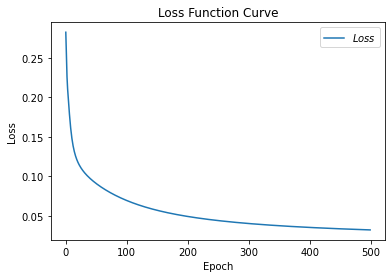

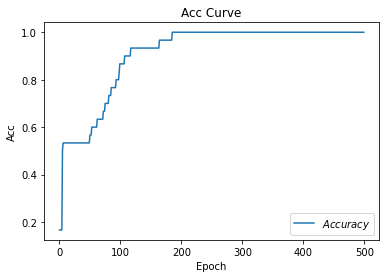

In [21]:
# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线

# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import time  ##1##

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

# 训练部分
now_time = time.time()  ##2##
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

        # 实现梯度更新 w1 = w1 - lr * w1_grad    b = b - lr * b_grad
        w1.assign_sub(lr * grads[0])  # 参数w1自更新
        b1.assign_sub(lr * grads[1])  # 参数b自更新

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
total_time = time.time() - now_time  ##3##
print("total_time", total_time)  ##4##

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.savefig('sgd_loss')
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.savefig('sgd_acc')
plt.show()

# 本文件较 class1\p45_iris.py 仅添加四处时间记录  用 ##n## 标识
# 请将loss曲线、ACC曲线、total_time记录到 class2\优化器对比.docx  对比各优化器收敛情况


### SGDM

- $m_t = \beta* m_{t-1} + (1-\beta)*g_t$
- $V_t = 1$

### Adagrad

- 在SGDM基础上增加二阶动量
- $m_t = g_t$
- $v_t = \sum_{\tau = 1}^t g_{\tau}^2$

### RMSProp
- $m_t = g_t$
- $V_t = \beta*V_{t-1} + (1-\beta)*g_t^2$

### Adam 同时结合SGDM的一阶动量和RMSProp的二阶动量
- $m_t = \beta_1* m_{t-1} + (1-\beta_1)*g_t$
- 修正 $\hat m_t = {m_t \over 1-\beta_1^2}$
- $V_t = \beta_2*V_{step-1} + (1- \beta_2)*g_t^2$
- 修正 $\hat V_t = {V_t \over 1-\beta_2^2}$

## 搭建神经网络

### Sequence 六步法
- import
- train test
- model = tf.keras.models.Sequential
- model.compile
- model.fit
- model.summary

In [27]:
import tensorflow as tf
from sklearn import datasets
import numpy as np

x_train = datasets.load_iris().data
y_train = datasets.load_iris().target

np.random.seed(116)
np.random.shuffle(x_train)
np.random.seed(116)
np.random.shuffle(y_train)
tf.random.set_seed(116)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2())
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=500, validation_split=0.2, validation_freq=20)

model.summary()


Train on 120 samples, validate on 30 samples
Epoch 1/500
120/120 [==============================] - 1s 8ms/sample - loss: 2.2022 - sparse_categorical_accuracy: 0.3833
Epoch 2/500
120/120 [==============================] - 0s 141us/sample - loss: 1.0013 - sparse_categorical_accuracy: 0.6083
Epoch 3/500
120/120 [==============================] - 0s 108us/sample - loss: 0.8497 - sparse_categorical_accuracy: 0.6333
Epoch 4/500
120/120 [==============================] - 0s 91us/sample - loss: 0.7882 - sparse_categorical_accuracy: 0.6667
Epoch 5/500
120/120 [==============================] - 0s 108us/sample - loss: 0.6539 - sparse_categorical_accuracy: 0.6750
Epoch 6/500
120/120 [==============================] - 0s 100us/sample - loss: 0.6065 - sparse_categorical_accuracy: 0.7250
Epoch 7/500
120/120 [==============================] - 0s 66us/sample - loss: 0.8622 - sparse_categorical_accuracy: 0.6667
Epoch 8/500
120/120 [==============================] - 0s 100us/sample - loss: 0.6943 - spa

120/120 [==============================] - 0s 91us/sample - loss: 0.4364 - sparse_categorical_accuracy: 0.8250
Epoch 66/500
120/120 [==============================] - 0s 100us/sample - loss: 0.3745 - sparse_categorical_accuracy: 0.9333
Epoch 67/500
120/120 [==============================] - 0s 75us/sample - loss: 0.3946 - sparse_categorical_accuracy: 0.8917
Epoch 68/500
120/120 [==============================] - 0s 108us/sample - loss: 0.4084 - sparse_categorical_accuracy: 0.8583
Epoch 69/500
120/120 [==============================] - 0s 100us/sample - loss: 0.3824 - sparse_categorical_accuracy: 0.9333
Epoch 70/500
120/120 [==============================] - 0s 125us/sample - loss: 0.3920 - sparse_categorical_accuracy: 0.9083
Epoch 71/500
120/120 [==============================] - 0s 141us/sample - loss: 0.3698 - sparse_categorical_accuracy: 0.9417
Epoch 72/500
120/120 [==============================] - 0s 100us/sample - loss: 0.3671 - sparse_categorical_accuracy: 0.9333
Epoch 73/500
12

120/120 [==============================] - 0s 66us/sample - loss: 0.3550 - sparse_categorical_accuracy: 0.9250
Epoch 194/500
120/120 [==============================] - 0s 66us/sample - loss: 0.3908 - sparse_categorical_accuracy: 0.8750
Epoch 195/500
120/120 [==============================] - 0s 58us/sample - loss: 0.5463 - sparse_categorical_accuracy: 0.7667
Epoch 196/500
120/120 [==============================] - 0s 58us/sample - loss: 0.3840 - sparse_categorical_accuracy: 0.9000
Epoch 197/500
120/120 [==============================] - 0s 83us/sample - loss: 0.3859 - sparse_categorical_accuracy: 0.9250
Epoch 198/500
120/120 [==============================] - 0s 75us/sample - loss: 0.4737 - sparse_categorical_accuracy: 0.8250
Epoch 199/500
120/120 [==============================] - 0s 75us/sample - loss: 0.3752 - sparse_categorical_accuracy: 0.9250
Epoch 200/500
120/120 [==============================] - 0s 125us/sample - loss: 0.3495 - sparse_categorical_accuracy: 0.9667 - val_loss: 0

Epoch 321/500
120/120 [==============================] - 0s 58us/sample - loss: 0.3493 - sparse_categorical_accuracy: 0.9750
Epoch 322/500
120/120 [==============================] - 0s 66us/sample - loss: 0.3439 - sparse_categorical_accuracy: 0.9583
Epoch 323/500
120/120 [==============================] - 0s 58us/sample - loss: 0.4607 - sparse_categorical_accuracy: 0.8333
Epoch 324/500
120/120 [==============================] - 0s 83us/sample - loss: 0.4047 - sparse_categorical_accuracy: 0.8917
Epoch 325/500
120/120 [==============================] - 0s 58us/sample - loss: 0.3510 - sparse_categorical_accuracy: 0.9667
Epoch 326/500
120/120 [==============================] - 0s 67us/sample - loss: 0.3791 - sparse_categorical_accuracy: 0.9000
Epoch 327/500
120/120 [==============================] - 0s 58us/sample - loss: 0.3703 - sparse_categorical_accuracy: 0.9250
Epoch 328/500
120/120 [==============================] - 0s 66us/sample - loss: 0.4298 - sparse_categorical_accuracy: 0.8583


120/120 [==============================] - 0s 75us/sample - loss: 0.3348 - sparse_categorical_accuracy: 0.9667
Epoch 449/500
120/120 [==============================] - 0s 58us/sample - loss: 0.3560 - sparse_categorical_accuracy: 0.9333
Epoch 450/500
120/120 [==============================] - 0s 58us/sample - loss: 0.3427 - sparse_categorical_accuracy: 0.9667
Epoch 451/500
120/120 [==============================] - 0s 58us/sample - loss: 0.3458 - sparse_categorical_accuracy: 0.9667
Epoch 452/500
120/120 [==============================] - 0s 58us/sample - loss: 0.3286 - sparse_categorical_accuracy: 0.9500
Epoch 453/500
120/120 [==============================] - 0s 91us/sample - loss: 0.3387 - sparse_categorical_accuracy: 0.9583
Epoch 454/500
120/120 [==============================] - 0s 67us/sample - loss: 0.3483 - sparse_categorical_accuracy: 0.9500
Epoch 455/500
120/120 [==============================] - 0s 50us/sample - loss: 0.3700 - sparse_categorical_accuracy: 0.9250
Epoch 456/500


In [32]:
#help(tf.keras.models.Sequential)
#help(model.compile)
#help(model.fit)
help(model.summary) #Prints a string summary of the network.

Help on method summary in module tensorflow.python.keras.engine.network:

summary(line_length=None, positions=None, print_fn=None) method of tensorflow.python.keras.engine.sequential.Sequential instance
    Prints a string summary of the network.
    
    Arguments:
        line_length: Total length of printed lines
            (e.g. set this to adapt the display to different
            terminal window sizes).
        positions: Relative or absolute positions of log elements
            in each line. If not provided,
            defaults to `[.33, .55, .67, 1.]`.
        print_fn: Print function to use. Defaults to `print`.
            It will be called on each line of the summary.
            You can set it to a custom function
            in order to capture the string summary.
    
    Raises:
        ValueError: if `summary()` is called before the model is built.



## Class 六步法
- 既可以顺序，又可以跳连接
- init中搭建网络积木
- call写出前向传播

In [33]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from sklearn import datasets
import numpy as np

x_train = datasets.load_iris().data
y_train = datasets.load_iris().target

np.random.seed(116)
np.random.shuffle(x_train)
np.random.seed(116)
np.random.shuffle(y_train)
tf.random.set_seed(116)

class IrisModel(Model): #from tensorflow.keras import Model
    def __init__(self):
        super(IrisModel, self).__init__()
        self.d1 = Dense(3, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2())

    def call(self, x):
        y = self.d1(x)
        return y

model = IrisModel()

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=500, validation_split=0.2, validation_freq=20)
model.summary()



Train on 120 samples, validate on 30 samples
Epoch 1/500
120/120 [==============================] - 0s 2ms/sample - loss: 2.2022 - sparse_categorical_accuracy: 0.3833
Epoch 2/500
120/120 [==============================] - 0s 88us/sample - loss: 1.0013 - sparse_categorical_accuracy: 0.6083
Epoch 3/500
120/120 [==============================] - 0s 116us/sample - loss: 0.8497 - sparse_categorical_accuracy: 0.6333
Epoch 4/500
120/120 [==============================] - 0s 108us/sample - loss: 0.7882 - sparse_categorical_accuracy: 0.6667
Epoch 5/500
120/120 [==============================] - 0s 91us/sample - loss: 0.6539 - sparse_categorical_accuracy: 0.6750
Epoch 6/500
120/120 [==============================] - 0s 96us/sample - loss: 0.6065 - sparse_categorical_accuracy: 0.7250
Epoch 7/500
120/120 [==============================] - 0s 65us/sample - loss: 0.8622 - sparse_categorical_accuracy: 0.6667
Epoch 8/500
120/120 [==============================] - 0s 108us/sample - loss: 0.6943 - spars

120/120 [==============================] - 0s 105us/sample - loss: 0.3538 - sparse_categorical_accuracy: 0.9500
Epoch 129/500
120/120 [==============================] - 0s 66us/sample - loss: 0.4007 - sparse_categorical_accuracy: 0.8833
Epoch 130/500
120/120 [==============================] - 0s 60us/sample - loss: 0.3546 - sparse_categorical_accuracy: 0.9583
Epoch 131/500
120/120 [==============================] - 0s 90us/sample - loss: 0.4608 - sparse_categorical_accuracy: 0.8333
Epoch 132/500
120/120 [==============================] - 0s 58us/sample - loss: 0.5296 - sparse_categorical_accuracy: 0.8750
Epoch 133/500
120/120 [==============================] - 0s 100us/sample - loss: 0.3529 - sparse_categorical_accuracy: 0.9500
Epoch 134/500
120/120 [==============================] - 0s 83us/sample - loss: 0.4174 - sparse_categorical_accuracy: 0.8417
Epoch 135/500
120/120 [==============================] - 0s 50us/sample - loss: 0.4491 - sparse_categorical_accuracy: 0.8583
Epoch 136/50

120/120 [==============================] - 0s 102us/sample - loss: 0.3839 - sparse_categorical_accuracy: 0.8917
Epoch 193/500
120/120 [==============================] - 0s 125us/sample - loss: 0.3550 - sparse_categorical_accuracy: 0.9250
Epoch 194/500
120/120 [==============================] - 0s 108us/sample - loss: 0.3908 - sparse_categorical_accuracy: 0.8750
Epoch 195/500
120/120 [==============================] - 0s 134us/sample - loss: 0.5463 - sparse_categorical_accuracy: 0.7667
Epoch 196/500
120/120 [==============================] - 0s 116us/sample - loss: 0.3840 - sparse_categorical_accuracy: 0.9000
Epoch 197/500
120/120 [==============================] - 0s 125us/sample - loss: 0.3859 - sparse_categorical_accuracy: 0.9250
Epoch 198/500
120/120 [==============================] - 0s 133us/sample - loss: 0.4737 - sparse_categorical_accuracy: 0.8250
Epoch 199/500
120/120 [==============================] - 0s 123us/sample - loss: 0.3752 - sparse_categorical_accuracy: 0.9250
Epoch 

120/120 [==============================] - 0s 56us/sample - loss: 0.6053 - sparse_categorical_accuracy: 0.7250
Epoch 319/500
120/120 [==============================] - 0s 66us/sample - loss: 0.3911 - sparse_categorical_accuracy: 0.8833
Epoch 320/500
120/120 [==============================] - 0s 141us/sample - loss: 0.4109 - sparse_categorical_accuracy: 0.8750 - val_loss: 0.4588 - val_sparse_categorical_accuracy: 0.8333
Epoch 321/500
120/120 [==============================] - 0s 92us/sample - loss: 0.3493 - sparse_categorical_accuracy: 0.9750
Epoch 322/500
120/120 [==============================] - 0s 50us/sample - loss: 0.3439 - sparse_categorical_accuracy: 0.9583
Epoch 323/500
120/120 [==============================] - 0s 91us/sample - loss: 0.4607 - sparse_categorical_accuracy: 0.8333
Epoch 324/500
120/120 [==============================] - 0s 73us/sample - loss: 0.4047 - sparse_categorical_accuracy: 0.8917
Epoch 325/500
120/120 [==============================] - 0s 55us/sample - los

120/120 [==============================] - 0s 66us/sample - loss: 0.3460 - sparse_categorical_accuracy: 0.9583
Epoch 382/500
120/120 [==============================] - 0s 83us/sample - loss: 0.3415 - sparse_categorical_accuracy: 0.9750
Epoch 383/500
120/120 [==============================] - 0s 58us/sample - loss: 0.3418 - sparse_categorical_accuracy: 0.9583
Epoch 384/500
120/120 [==============================] - 0s 96us/sample - loss: 0.3488 - sparse_categorical_accuracy: 0.9667
Epoch 385/500
120/120 [==============================] - 0s 58us/sample - loss: 0.3465 - sparse_categorical_accuracy: 0.9500
Epoch 386/500
120/120 [==============================] - 0s 65us/sample - loss: 0.3333 - sparse_categorical_accuracy: 0.9500
Epoch 387/500
120/120 [==============================] - 0s 70us/sample - loss: 0.3620 - sparse_categorical_accuracy: 0.9167
Epoch 388/500
120/120 [==============================] - 0s 64us/sample - loss: 0.3658 - sparse_categorical_accuracy: 0.9333
Epoch 389/500


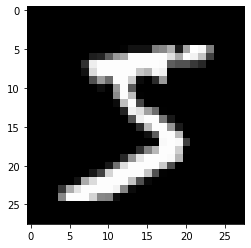

x_train[0]:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 2

In [34]:
import tensorflow as tf
from matplotlib import pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 可视化训练集输入特征的第一个元素
plt.imshow(x_train[0], cmap='gray')  # 绘制灰度图
plt.show()

# 打印出训练集输入特征的第一个元素
print("x_train[0]:\n", x_train[0])

# 打印出训练集标签的第一个元素
print("y_train[0]:\n", y_train[0])

# 打印出整个训练集输入特征形状
print("x_train.shape:\n", x_train.shape)
# 打印出整个训练集标签的形状
print("y_train.shape:\n", y_train.shape)
# 打印出整个测试集输入特征的形状
print("x_test.shape:\n", x_test.shape)
# 打印出整个测试集标签的形状
print("y_test.shape:\n", y_test.shape)


In [35]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
model.summary()


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2538 - sparse_categorical_accuracy: 0.9272 - val_loss: 0.1397 - val_sparse_categorical_accuracy: 0.9603
Epoch 2/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.1138 - sparse_categorical_accuracy: 0.9662 - val_loss: 0.0974 - val_sparse_categorical_accuracy: 0.9701
Epoch 3/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0791 - sparse_categorical_accuracy: 0.9760 - val_loss: 0.0825 - val_sparse_categorical_accuracy: 0.9750
Epoch 4/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0598 - sparse_categorical_accuracy: 0.9822 - val_loss: 0.0723 - val_sparse_categorical_accuracy: 0.9775
Epoch 5/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0461 - sparse_categorical_accuracy: 0.9862 - val_loss: 0.0775 - val_sparse_categorical_accuracy: 0.9765
Model: "sequential_

In [15]:
#help(tf.keras.layers.Dense)

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model

fashion = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 #归一化
#help(fashion.load_data)

class MnistModel(Model):
    def __init__(self):
        super(MnistModel, self).__init__()
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        y = self.d2(x)
        return y


model = MnistModel()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
model.summary()


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.5004 - sparse_categorical_accuracy: 0.8230 - val_loss: 0.4249 - val_sparse_categorical_accuracy: 0.8515
Epoch 2/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3738 - sparse_categorical_accuracy: 0.8663 - val_loss: 0.4171 - val_sparse_categorical_accuracy: 0.8467
Epoch 3/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3354 - sparse_categorical_accuracy: 0.8772 - val_loss: 0.3563 - val_sparse_categorical_accuracy: 0.8725
Epoch 4/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3110 - sparse_categorical_accuracy: 0.8854 - val_loss: 0.3610 - val_sparse_categorical_accuracy: 0.8717
Epoch 5/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2941 - sparse_categorical_accuracy: 0.8916 - val_loss: 0.3478 - val_sparse_categorical_accuracy: 0.8741
Model: "mnist_model"

In [4]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
## 数据增强
- from tensorflow.keras.preprocessing.image import ImageDataGenerator
- rescale 随机旋转 随机高宽偏移 水平翻转 随机缩放

xtrain (60000, 28, 28, 1)
xtrain_subset1 (24, 28, 28)
xtrain (60000, 28, 28, 1)
xtrain_subset2 (24, 28, 28, 1)


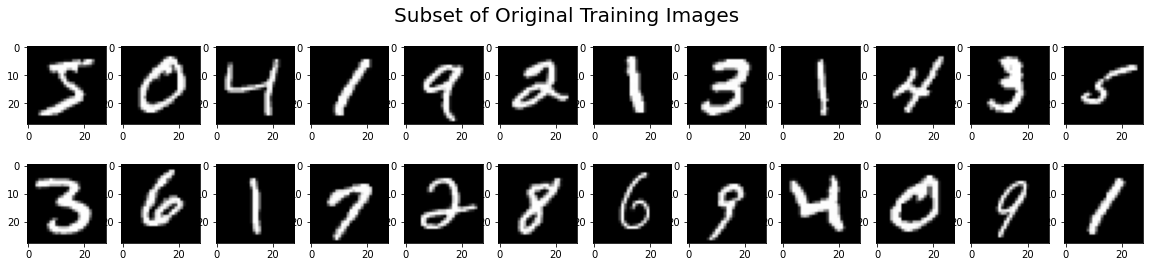

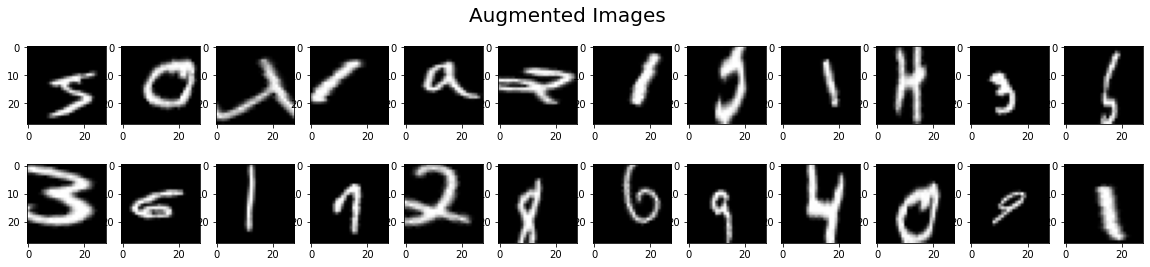

In [15]:
# 显示原始图像和增强后的图像
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

image_gen_train = ImageDataGenerator( #Generate batches of tensor image data with real-time data augmentation.
    rescale=1. / 255,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=False,
    zoom_range=0.5
)

image_gen_train.fit(x_train) #Fits the data generator to some sample data.
print("xtrain",x_train.shape)

x_train_subset1 = np.squeeze(x_train[:24])
print("xtrain_subset1",x_train_subset1.shape)
print("xtrain",x_train.shape)

x_train_subset2 = x_train[:24]  # 一次显示24张图片
print("xtrain_subset2",x_train_subset2.shape)

fig = plt.figure(figsize=(20, 4))
plt.set_cmap('gray')
# 显示原始图片
for i in range(0, len(x_train_subset1)):
    ax = fig.add_subplot(2, 12, i + 1)
    ax.imshow(x_train_subset1[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# 显示增强后的图片
fig = plt.figure(figsize=(20, 4))
for x_batch in image_gen_train.flow(x_train_subset2, batch_size=24, shuffle=False):
    for i in range(0, 24):
        ax = fig.add_subplot(2, 12, i + 1)
        ax.imshow(np.squeeze(x_batch[i]))
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;


In [12]:
#help(image_gen_train)

In [13]:
gset = image_gen_train.flow(x_train_subset2, batch_size=12, shuffle=False)

In [22]:
#for idx,obj in enumerate(gset): #120000+
#    if(idx % 1000 == 0):
#        print(idx)

## 神经网络模版实例
- 读取数据
- 数据增强
- 搭建模型
- 存储模型 路径+回调
- 网络配置 训练 总结
- plt数据可视化
- 训练完毕后的 测试

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
# 读取数据
fashion = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 增加维度满足 NHWC
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  # 给数据增加一个维度，使数据和网络结构匹配

#数据增强
image_gen_train = ImageDataGenerator(
    rescale=1. / 1.,  # 如为图像，分母为255时，可归至0～1 之前已经做过/255 故而不需要了
    rotation_range=45,  # 随机45度旋转
    width_shift_range=.15,  # 宽度偏移
    height_shift_range=.15,  # 高度偏移
    horizontal_flip=True,  # 水平翻转
    zoom_range=0.5  # 将图像随机缩放阈量50％
)
image_gen_train.fit(x_train)

# 搭建网络模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# 存储路径
checkpoint_save_path = "./checkpoint/fashion.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path) #如果已经有模型的话就断点续训

    
# 回调函数
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

# 网络配置
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

# 网络训练
history = model.fit(image_gen_train.flow(x_train, y_train, batch_size=32), 
                    epochs=10, 
                    validation_data=(x_test, y_test),
                    validation_freq=1,
                   callbacks=[cp_callback])

# 网络总结
model.summary()
'''

#保存参数到文件中
print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

'''

Train for 1875 steps, validate on 10000 samples
Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 1.5127 - sparse_categorical_accuracy: 0.4605 - val_loss: 1.0135 - val_sparse_categorical_accuracy: 0.6286
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 1.2810 - sparse_categorical_accuracy: 0.5415 - val_loss: 0.9695 - val_sparse_categorical_accuracy: 0.6685
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 1.2080 - sparse_categorical_accuracy: 0.5647 - val_loss: 0.9172 - val_sparse_categorical_accuracy: 0.6665
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 1.1687 - sparse_categorical_accuracy: 0.5772 - val_loss: 0.9014 - val_sparse_categorical_accuracy: 0.6695
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 1.1345 - sparse_categorical_accuracy: 0.5869 - val_loss: 0.8460 - val_sparse_categorical_accuracy: 0.6916
Epoch 6/10
1875/1875 [==========

"\n\n#保存参数到文件中\nprint(model.trainable_variables)\nfile = open('./weights.txt', 'w')\nfor v in model.trainable_variables:\n    file.write(str(v.name) + '\n')\n    file.write(str(v.shape) + '\n')\n    file.write(str(v.numpy()) + '\n')\nfile.close()\n\n"

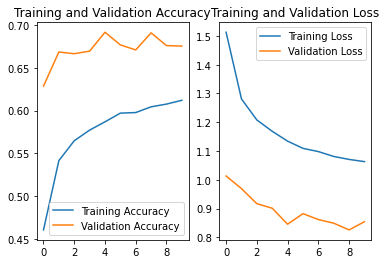

In [11]:
# 显示训练集和验证集的acc和loss曲线
import matplotlib.pyplot as plt

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### 测试模块
- 模型复现
- 权重读取
- 数据清洗 【可选】
- 输入网络预测

In [5]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
type = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

model_save_path = './checkpoint/fashion.ckpt'
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
                                        
model.load_weights(model_save_path)

print('loading complete!')


loading complete!


input the number of test pictures:2
the path of test picture:./fashion_img/4_1.jpg


Coat


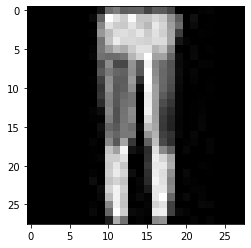

the path of test picture:./fashion_img/20_0.jpg


Trouser


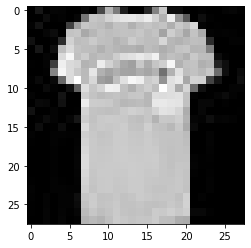

In [6]:
preNum = int(input("input the number of test pictures:"))
for i in range(preNum):
    image_path = input("the path of test picture:")

    img = Image.open(image_path)

    image = plt.imread(image_path)
    plt.set_cmap('gray')
    plt.imshow(image)

    img=img.resize((28,28),Image.ANTIALIAS)
    img_arr = np.array(img.convert('L'))
    img_arr = 255 - img_arr

    img_arr=img_arr/255.0

    x_predict = img_arr[tf.newaxis,...]

    result = model.predict(x_predict)
    pred=tf.argmax(result, axis=1)
    print('\n')
    print(type[int(pred)])

    plt.pause(1)
    plt.close()

In [7]:
#help(cp_callback)